# MSYT

Analizamos el MSYT para el punto de equilibrio $P_3 = \left(\frac{m + q_2 E}{ab}, \frac{1}{a} \left( r - \frac{r(m + q_2 E)}{K ab} - q_1 E \right) \right)$ 
para los parámetros:

## Sobreviven ambas especies

In [113]:
# Parámetros biológicos
r = 1.5      # Tasa de crecimiento de presas (año⁻¹)
K = 5000.0   # Capacidad de carga (AUMENTADA para permitir x* < K)
m = 0.2      # Mortalidad natural de depredadores (REDUCIDA)
b = 0.5      # Eficiencia de conversión presa→depredador (AUMENTADA)
a = 0.002    # Tasa de depredación (AUMENTADA para que necesiten menos presas)

# Parámetros de captura
q1 = 0.0001  # Capturabilidad de presas (REDUCIDA para no colapsar la base)
q2 = 0.01    # Capturabilidad de depredadores

# Control
E_max = 500.0 # Esfuerzo máximo permitido

# Parámetros económicos
p1 = 100.0   
p2 = 200.0   
c = 50.0     
δ = 0.05     

# Vector de parámetros completo
params = [r, K, m, b, a, q1, q2, p1, p2, c, δ]

# Condiciones iniciales
x0 = 2000.0   
y0 = 300.0   

300.0

$$
\begin{align*}
  &= \left(\frac{q_1 m}{ab} + \frac{q_2 r}{a} - \frac{q_2 r m}{K a^2 b}\right)E + \left(\frac{q_1 q_2}{ab} - \frac{q_2^2 r}{K a^2 b} - \frac{q_1 q_2}{a}\right) E^2\\
  &= B E + A E^2
\end{align*}
$$

In [114]:
A = ((q1 * q2) / (a * b) - (q2^2 * r) / (K * a^2 * b) - (q1 * q2) / a)
B = ((q1 * m) / (a * b) + (q2 * r) / a - (q2 * r * m) / (K * a^2 * b))

7.22

Recordar que según el análisis, un requerimiento para la existencia de un $E^*$ tal que $Y(E^*) = MSY$ es que $A < 0$, veamos que se cumple:

In [115]:
A

-0.0145

También necesitamos que el esfuerzo $E^*$ sea positivo, lo que se cumple si la expresión
$$
B = \left(\frac{q_1 m}{ab} + \frac{q_2 r}{a} - \frac{q_2 r m}{K a^2 b}\right) > 0
$$

In [116]:
B

7.22

Con ello, el $E^*$ que maximiza el rendimiento de pesca viene dado por:
$$
E^* = \frac{-B}{2A}
$$

In [117]:
E_star = -B / (2 * A)

248.9655172413793

queremos que el equilibrio asociado a este esfuerzo sea positivo, en concreto la coordenada $y$ de este equilibrio, es decir:
$$
y^* = \frac{1}{a} \left( r - \frac{r(m + q_2 E^*)}{K ab} - q_1 E^* \right) > 0
$$

In [118]:
r - (r * (m + q2 * E_star)) / (K * a * b) - q1 * E_star

0.6682068965517242

Este $E^*$ maximiza el rendimiento de pesca (Yield):
$$
Y (E) = q_1 \frac{m + q_2 E}{ab}*E + q_2 \frac{1}{a} \left( r - \frac{r(m + q_2 E)}{K ab} - q_1 E \right)*E
$$

In [119]:
using Plots
function equilibrium_populations(E, params)
    r, K, m, b, a, q1, q2, p1, p2, c, δ = params
    x_star = (m + q2 * E) / (a * b)
    y_star = (r - r / K * x_star - q1 * E) / a
    return (x_star, y_star)
end
function yield(E, params)
    r, K, m, b, a, q1, q2, p1, p2, c, δ = params
    x_star, y_star = equilibrium_populations(E, params)
    Y = q1 * x_star * E + q2 * y_star * E
    return Y
end


yield (generic function with 1 method)

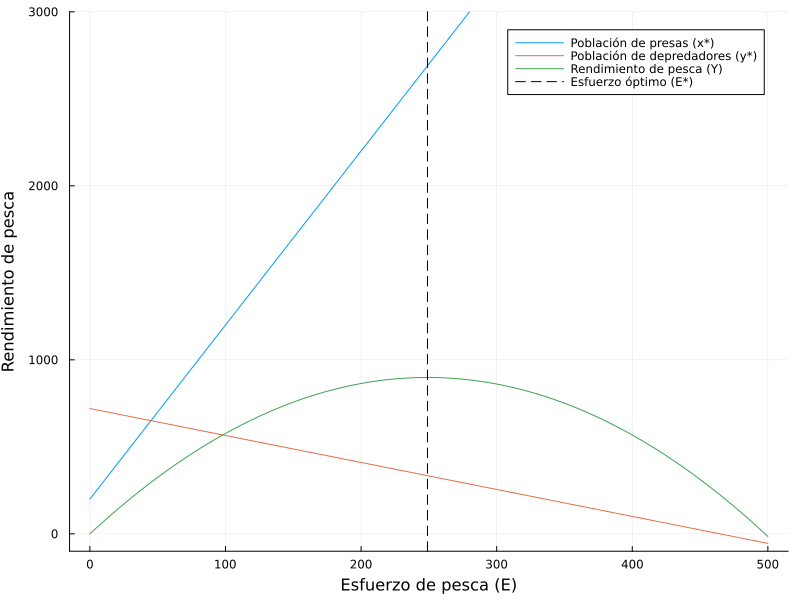

In [120]:
plot(e -> equilibrium_populations(e, params)[1], 0, E_max, label="Población de presas (x*)", xlabel="Esfuerzo de pesca (E)", ylabel="Población en equilibrio", legend=:topright, size=(800, 600), ylims=(-100, 3000))
plot!(e -> equilibrium_populations(e, params)[2], 0, E_max, label="Población de depredadores (y*)")
plot!(e -> yield(e, params), 0, E_max, label="Rendimiento de pesca (Y)", ylabel="Rendimiento de pesca")
vline!([E_star], label="Esfuerzo óptimo (E*)", linestyle=:dash, color=:black)

## Equilibrio con exterminio

El ejemplo anterior fué dado un set muy pequeño de parámetros, ya que se asume $q_2 >> q_1$ para la existencia de un equilibrio con ambas especies en cantidades positivas. Veamos el caso en el que $q_2$ es comparable a $q_1$, tal que trabajamos el sistema tal que si $y^* \leq 0$ entonces el equilibrio es $P_2 = \left(\frac{m + q_2 E}{ab}, 0\right)$.



In [138]:
# Parámetros del sistema presa-depredador con control de pesca
# p = [r, K, m, b, a, q1, q2, E, p1, p2, c, δ]

# Parámetros biológicos
r = 0.5      # Tasa de crecimiento de presas (año⁻¹)
K = 1000.0   # Capacidad de carga (toneladas)
m = 0.3      # Mortalidad natural de depredadores (año⁻¹)
b = 0.4      # Eficiencia de conversión presa→depredador
a = 0.001    # Tasa de depredación (toneladas⁻¹·año⁻¹)

# Parámetros de captura
q1 = 0.005  # Capturabilidad de presas
q2 = 0.01   # Capturabilidad de depredadores (más fáciles de capturar)

# Control
E_max = 3000.0 # Esfuerzo máximo permitido

# Parámetros económicos
p1 = 100.0   # Precio por tonelada de presa ($/ton)
p2 = 200.0   # Precio por tonelada de depredador ($/ton) - más valioso
c = 50.0     # Costo por unidad de esfuerzo ($/día·barco)
δ = 0.05     # Tasa de descuento anual (5%)

# Vector de parámetros completo
params = [r, K, m, b, a, q1, q2, p1, p2, c, δ]

# Condiciones iniciales razonables
x0 = 500.0   # Población inicial de presas (50% de K)
y0 = 100.0   # Población inicial de depredadores

100.0

In [129]:
A

-0.0145

In [130]:
B

7.22

In [131]:
E_star = -B/(2*A)

248.9655172413793

In [132]:
equilibrium_populations(E_star, params)[2]

-4231.896551724138

Bajo estos parámetros el modelo basado solo en $P_3$ no es suficiente, ya que para esfuerzos de pesca altos el equilibrio es $P_2$. Por lo tanto, el rendimiento de pesca queda definido por tramos:

In [140]:
function equilibrium_populations(E, params)
    r, K, m, b, a, q1, q2, p1, p2, c, δ = params
    x_star = (m + q2 * E) / (a * b)
    y_star = (r - r / K * x_star - q1 * E) / a
    if y_star < 0
        x_star = (K*(r-q1 * E)) / (r)
        y_star = 0.0
    end
    return (x_star, y_star)
end
function yield(E, params)
    r, K, m, b, a, q1, q2, p1, p2, c, δ = params
    x_star, y_star = equilibrium_populations(E, params)
    Y = q1 * x_star * E + q2 * y_star * E
    return Y
end

yield (generic function with 1 method)

In [136]:
using Pkg
Pkg.add("Optim")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed Optim ─ v1.13.3
    Updating `~/proyects/pescado-controlado/Project.toml`
  [429524aa] + Optim v1.13.3
    Updating `~/proyects/pescado-controlado/Manifest.toml`
  [429524aa] ↑ Optim v1.13.2 ⇒ v1.13.3
Precompiling packages...
   5551.0 ms  ✓ Optim
   4329.1 ms  ✓ DiffEqNoiseProcess
   9800.8 ms  ✓ StochasticDiffEq
  15156.1 ms  ✓ DifferentialEquations
  4 dependencies successfully precompiled in 40 seconds. 444 already precompiled.


In [ ]:
n
result = optimize(objective_function, lower_bounds, upper_bounds, initial_E, Fminbox(LBFGS()))

# Extraer los resultados
E_opt = Optim.minimizer(result)[1]
max_yield = -Optim.minimum(result)

println("El esfuerzo óptimo es E* = ", E_opt)
println("El rendimiento máximo sostenible (MSY) es = ", max_yield)

El esfuerzo óptimo es E* = 50.000000021123384
El rendimiento máximo sostenible (MSY) es = 125.00000000000001


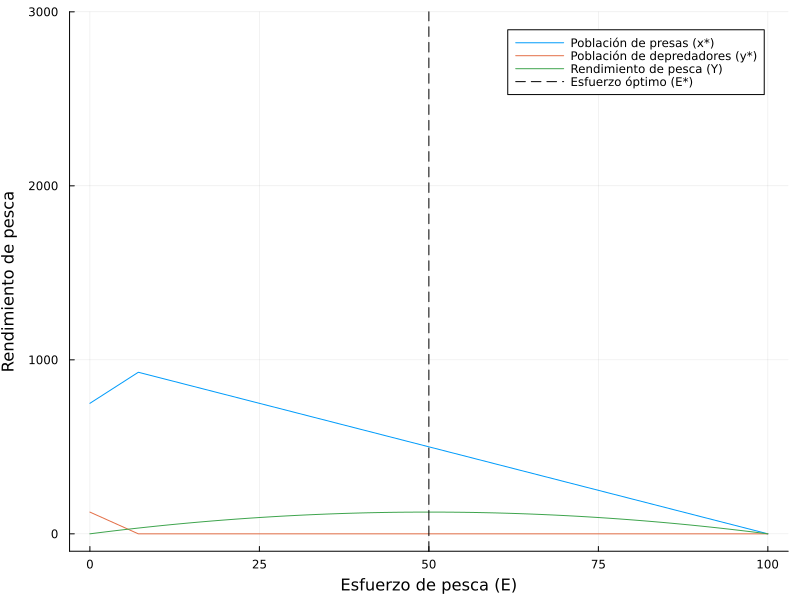

In [143]:
plot(e -> equilibrium_populations(e, params)[1], 0, 100, label="Población de presas (x*)", xlabel="Esfuerzo de pesca (E)", ylabel="Población en equilibrio", legend=:topright, size=(800, 600), ylims=(-100, 3000))
plot!(e -> equilibrium_populations(e, params)[2], 0, 100, label="Población de depredadores (y*)")
plot!(e -> yield(e, params), 0, 100, label="Rendimiento de pesca (Y)", ylabel="Rendimiento de pesca")
vline!([E_opt], label="Esfuerzo óptimo (E*)", linestyle=:dash, color=:black)